# Importing Necessary Libraries

In [38]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 

# Loading Dataset


In [24]:
df = pd.read_csv("D:/internships\devtern\Heart diesase prediction\Heart_Disease_Prediction.csv") 
print('Shape of the dataset:',df.shape)
print(df.head())


Shape of the dataset: (270, 14)
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence

# Data Preprocessing

In [27]:
label_mapping = {"Presence": 1, "Absence": 0}
df['target'] = df['Heart Disease'].map(label_mapping)
df.drop(columns=['Heart Disease'], inplace=True)
df = pd.get_dummies(dataframe, columns=['Sex'], drop_first=True)

# Visualizing Heart Disease Frequency by Gender

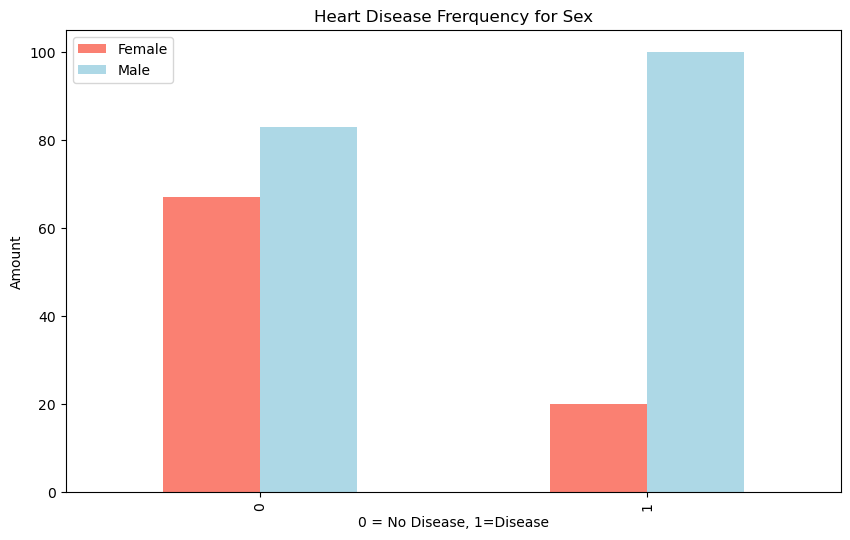

In [28]:
pd.crosstab(df.target, dataframe.Sex)  
pd.crosstab(df.target, dataframe.Sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])  
plt.title("Heart Disease Frerquency for Sex")  
plt.xlabel("0 = No Disease, 1=Disease")  
plt.ylabel("Amount")  
plt.legend(["Female","Male"]);  

# Splitting data into features (X) and target variable (y)

In [ ]:
X = dataframe.drop(columns=['target'])
y = dataframe['target']

# Splitting data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Logistic Regression Model


In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\JASHWANTH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing Model 

In [34]:
y_pred = model.predict(X_test)

# Model Evaluation

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print('Accuracy Score:')
print(accuracy*100)

Confusion Matrix:
[[32  1]
 [ 4 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Accuracy Score:
90.74074074074075


# Analyzing and visualization of Model Coefficients

Model Coefficients:
                    Feature  Coefficient
11  Number of vessels fluro     0.910387
1                       Sex     0.526756
9             ST depression     0.525543
8           Exercise angina     0.515442
2           Chest pain type     0.401494
12                 Thallium     0.352973
10              Slope of ST     0.160079
6               EKG results     0.145778
3                        BP     0.012499
4               Cholesterol     0.003325
7                    Max HR    -0.031016
0                       Age    -0.051839
5              FBS over 120    -0.308359


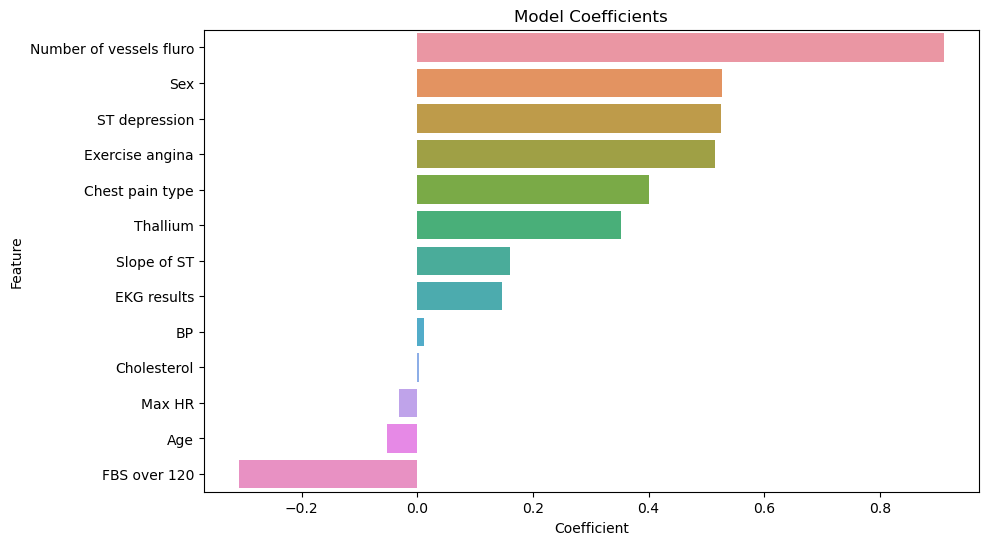

In [45]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Model Coefficients:")
print(coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Model Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()
